In [2]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Unzip all zipped files in folder `./PC3E-GS689/rmats/post`

### Panel a: pie chart for all events
- folders contains the input file: `./PC3E-GS689/rmats_filtering/`

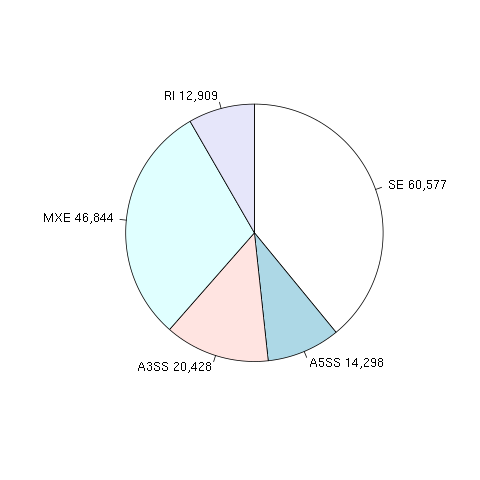

In [3]:
%%R
nSE <- system("cat ./PC3E-GS689/rmats_filtering/filtered_SE.MATS.JC.txt | wc -l ", intern = TRUE)
nA5SS <- system("cat ./PC3E-GS689/rmats_filtering/filtered_A5SS.MATS.JC.txt | wc -l ", intern = TRUE)
nA3SS <- system("cat ./PC3E-GS689/rmats_filtering/filtered_A3SS.MATS.JC.txt | wc -l ", intern = TRUE)
nMXE <- system("cat ./PC3E-GS689/rmats_filtering/filtered_MXE.MATS.JC.txt | wc -l ", intern = TRUE)
nRI <- system("cat ./PC3E-GS689/rmats_filtering/filtered_RI.MATS.JC.txt | wc -l ", intern = TRUE)

Prop <- c(SE = as.integer(nSE)-1, A5SS = as.integer(nA5SS)-1, A3SS = as.integer(nA3SS)-1, MXE = as.integer(nMXE)-1, RI = as.integer(nRI)-1)
labels <- paste0(names(Prop), ' ', format(Prop, big.mark = ','))

# pdf('plot/plot_pie_filtered.pdf', width = 4, height = 4)
pie(Prop , labels = labels, clockwise = T, angle = 0)
# legend("topright", c("SE","A5SS","A3SS","MXE","RI"), fill = rainbow(5))
# dev.off()

### Panel b: pie chart for significant events
- folders contains the input file: `./PC3E-GS689/rmats_filtering/`

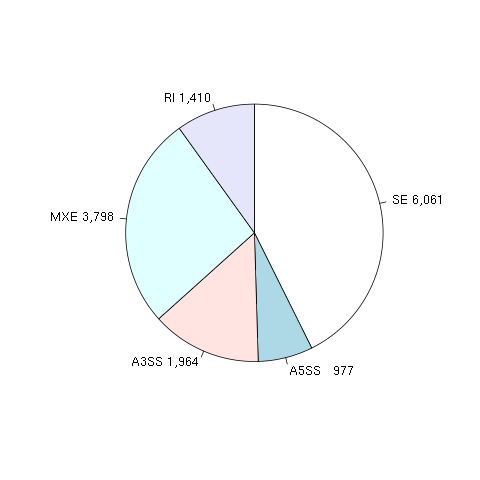

In [4]:
%%R
nSE <- system("cat ./PC3E-GS689/rmats_filtering/up_SE.MATS.JC.txt ./PC3E-GS689/rmats_filtering/dn_SE.MATS.JC.txt | wc -l ", intern = TRUE)
nA5SS <- system("cat ./PC3E-GS689/rmats_filtering/up_A5SS.MATS.JC.txt ./PC3E-GS689/rmats_filtering/dn_A5SS.MATS.JC.txt | wc -l ", intern = TRUE)
nA3SS <- system("cat ./PC3E-GS689/rmats_filtering/up_A3SS.MATS.JC.txt ./PC3E-GS689/rmats_filtering/dn_A3SS.MATS.JC.txt | wc -l ", intern = TRUE)
nMXE <- system("cat ./PC3E-GS689/rmats_filtering/up_MXE.MATS.JC.txt ./PC3E-GS689/rmats_filtering/dn_MXE.MATS.JC.txt | wc -l ", intern = TRUE)
nRI <- system("cat ./PC3E-GS689/rmats_filtering/up_RI.MATS.JC.txt ./PC3E-GS689/rmats_filtering/dn_RI.MATS.JC.txt | wc -l ", intern = TRUE)

Prop <- c(SE = as.integer(nSE)-2, A5SS = as.integer(nA5SS)-2, A3SS = as.integer(nA3SS)-2, MXE = as.integer(nMXE)-2, RI = as.integer(nRI)-2)
labels <- paste0(names(Prop), ' ', format(Prop, big.mark = ','))

# pdf('plot/plot_pie_significant.pdf', width = 4, height = 4)
pie(Prop , labels = labels, clockwise = T, angle = 0)
# dev.off()

### Panel c: Volcano Plot for SE events
- folders contains the input file: `./PC3E-GS689/rmats_filtering/`

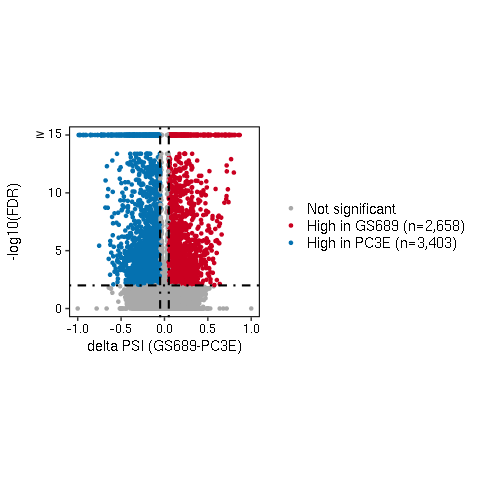

In [5]:
%%R
library(ggplot2)
library(ggrepel)

# load data
mydf = read.table('./PC3E-GS689/rmats_filtering/filtered_SE.MATS.JC.txt', header = T, row.names = 1, sep = '\t', stringsAsFactors = FALSE, check.names = FALSE)
up = read.table('./PC3E-GS689/rmats_filtering/up_SE.MATS.JC.txt', header = T, row.names = 1, sep = '\t', stringsAsFactors = FALSE, check.names = FALSE)
dn = read.table('./PC3E-GS689/rmats_filtering/dn_SE.MATS.JC.txt', header = T, row.names = 1, sep = '\t', stringsAsFactors = FALSE, check.names = FALSE)

mydf$col = 'Background'
mydf$col[mydf$ID %in% up$ID] = 'High in GS689'
mydf$col[mydf$ID %in% dn$ID] = 'High in PC3E'
mydf$col = factor(mydf$col, levels = c('Background', 'High in GS689', 'High in PC3E'))

xlab = 'delta PSI (GS689-PC3E)'

# process data
mydf$logFDR = -log10(mydf$FDR); 
mydf[which(is.infinite(mydf$logFDR) | mydf$logFDR > 15), 'logFDR'] = 15

# plot
p <- ggplot(mydf) + 
    geom_point(aes(x = -IncLevelDifference, y = logFDR, col = col)) +
    geom_hline(yintercept = 2, linetype="dotdash", color = "black", size = 1) +
    geom_vline(xintercept = -0.05, linetype="dotdash", color = "black", size = 1) +
    geom_vline(xintercept = 0.05, linetype="dotdash", color = "black", size = 1) +
    scale_color_manual(name = NULL,
                       labels = c('Not significant', 
                                  paste0(levels(mydf$col)[2], ' (n=', format(table(mydf$col)[levels(mydf$col)[2]], big.mark = ','), ')'), 
                                  paste0(levels(mydf$col)[3], ' (n=', format(table(mydf$col)[levels(mydf$col)[3]], big.mark = ','), ')')),
                       values = c('darkgrey', '#CA0020', '#0571B0'), 
                       guide = 'legend') +
    coord_cartesian(ylim = c(0, 15), expand = T) +
    labs(x = xlab, y = "-log10(FDR)") +
    scale_y_continuous(breaks = c(0, 5, 10, 15), labels=c('0', '5', '10', expression(phantom(y) >=15))) +
    theme_classic(base_size = 15) + 
    theme(aspect.ratio = 1,
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          axis.line = element_blank(),
          axis.text = element_text(color = 'black'),
          legend.text = element_text(size = 15, color = 'black'))

# pdf('plot/plot_valcano.pdf', width = 6, height = 3.5)
p
# dev.off()
# ggsave('plot/plot_valcano.pdf', plot = p, width = 6, height = 3.5)

### Panel d and e: Sashimi plot
- Software used [rmats2sashimiplot software](https://github.com/Xinglab/rmats2sashimiplot)
- Input files:
    - `./PC3E-GS689/plot_rmats2sashimi/sashimi_events_example.txt`: contains the events that will be plotted
    - `./PC3E-GS689/bam/`: contains the bam files (truncated to only include reads mapped to USO1 and MAST3 gene for illustration purpose)
    - `./PC3E-GS689/plot_rmats2sashimi/sashimi_groupInfo.txt`: contains the grouping information of the bam files
- Output file
    - `./PC3E-GS689/plot_rmats2sashimi/output_example/Sashimi_plot`: location where the output PDF files will be located
- Command used
    - `./PC3E-GS689/plot_rmats2sashimi/run_example.sh`: contains the command used to generate the sashimi plots.
    - it is also shown in the following cell.

In [7]:
%%bash
cd PC3E-GS689/plot_rmats2sashimi
rmats2sashimiplot  \
        --b1 ../bam/PC3E_rep1/Aligned.sortedByCoord.out.bam,../bam/PC3E_rep2/Aligned.sortedByCoord.out.bam,../bam/PC3E_rep3/Aligned.sortedByCoord.out.bam \
        --b2 ../bam/GS689_rep1/Aligned.sortedByCoord.out.bam,../bam/GS689_rep2/Aligned.sortedByCoord.out.bam,../bam/GS689_rep3/Aligned.sortedByCoord.out.bam \
        -t SE \
        -e sashimi_events_example.txt \
        --l1 PC3E_rep --l2 GS689_rep \
        --exon_s 1 --intron_s 5 \
        -o ./output_example \
        --group-info sashimi_groupInfo.txt

<module 'misopy' from '/mnt/isilon/xing_lab/wangy14/Software/Anaconda2-2019.03-Linux-x86_64/lib/python2.7/site-packages/rmats2sashimiplot-2.0.2-py2.7.egg/MISO/misopy/__init__.pyc'>
Indexing GFF...
/mnt/isilon/xing_lab/wangy14/project/annotation_rmats-turbo/nature_protocols/PC3E-GS689/plot_rmats2sashimi/output_example/Sashimi_index_USO1_1/tmp.gff3 appears to already be indexed. Aborting.
chr4:76714843:76715054:+@chr4:76716489:76716509:+@chr4:76720775:76720885:+ chr4:76714843:76715054:+@chr4:76716489:76716509:+@chr4:76720775:76720885:+
Reading settings from: /mnt/isilon/xing_lab/wangy14/project/annotation_rmats-turbo/nature_protocols/PC3E-GS689/plot_rmats2sashimi/output_example/Sashimi_index_USO1_1/sashimi_plot_settings.txt
Parsing data:bam_prefix
Parsing data:miso_prefix
Parsing data:bam_files
Parsing data:miso_files
Parsing plotting:group_info
Parsing plotting:font_size
Parsing plotting:reverse_minus
Parsing plotting:show_xlabel
Parsing plotting:nyticks
Parsing plotting:min_counts
Pars

/mnt/isilon/xing_lab/wangy14/Software/Anaconda2-2019.03-Linux-x86_64/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/mnt/isilon/xing_lab/wangy14/Software/Anaconda2-2019.03-Linux-x86_64/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
